<a href="https://colab.research.google.com/github/Himmmmanshu/Oasis-Infobyte-Internship/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Flower Classification through Python**
**Oasis Infobyte Data Science Internship**
# Task 1

Importing Necessary Libraries




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
count_value = df.groupby('Species')['Species'].count()

Text(0.5, 1.0, 'Species Value')

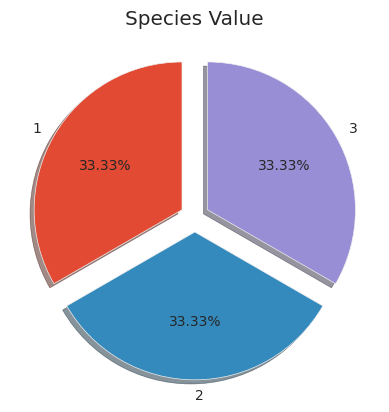

In [ ]:
plt.pie(count_value,labels=count_value.index,startangle=90,autopct='%1.2f%%',explode=[0.1,0.1,0.1],shadow=True)
plt.title('Species Value')

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: >

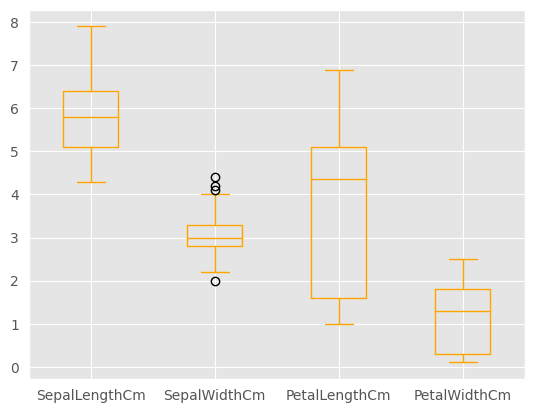

In [ ]:
plt.style.use('ggplot')
df.boxplot(column=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],color='orange')

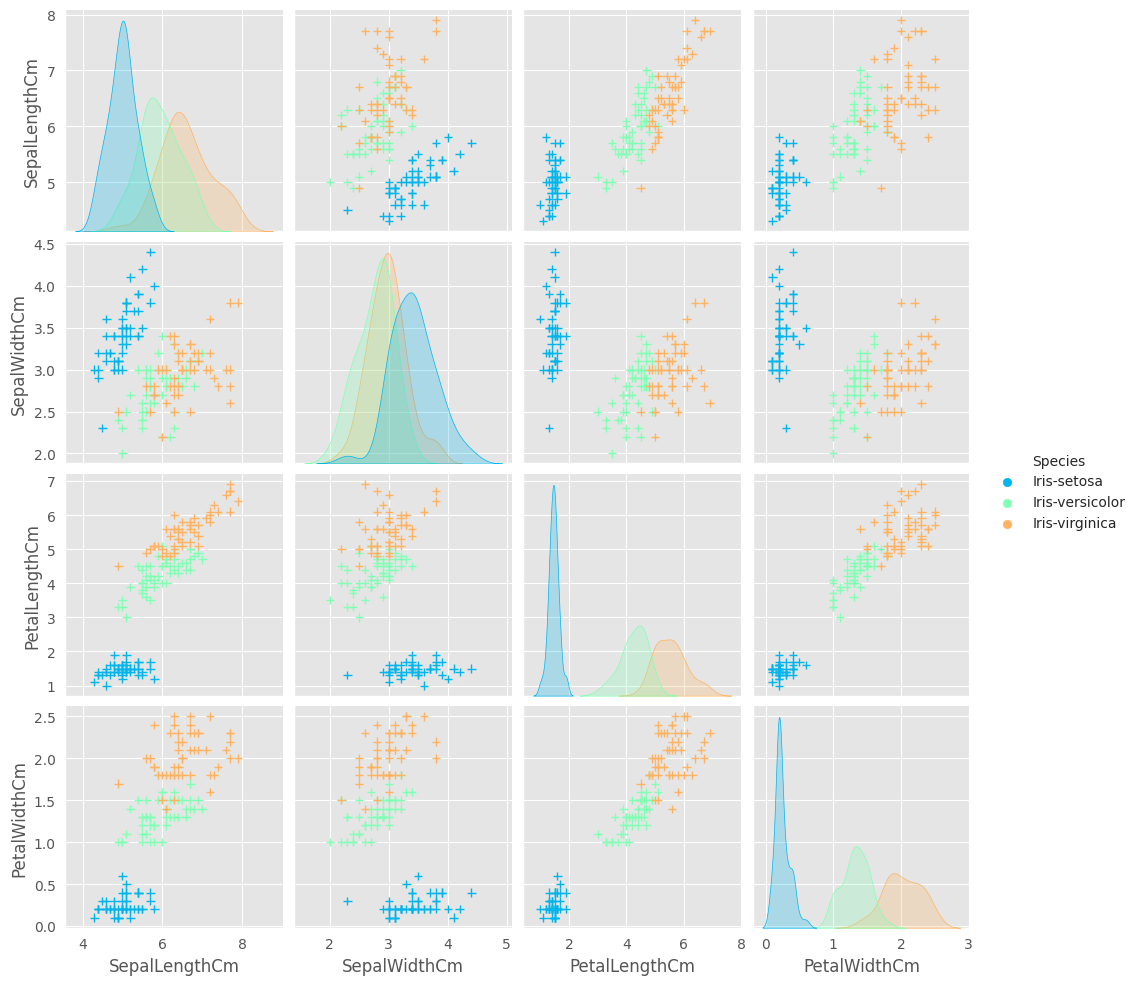

In [ ]:
sns.pairplot(df.drop("Id",axis=1),hue='Species',plot_kws=dict(marker="+", linewidth=1),palette='rainbow')

In [ ]:
df['Species'] = df['Species'].map({'Iris-setosa':1,'Iris-virginica':2,'Iris-versicolor':3})

In [ ]:
df.set_index('Id',inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


# **Creating a Machine Learning Model**


In [ ]:
X = df.drop('Species',axis=1) # Independent Variables
y = df['Species'] # Dependent Variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = lr.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       0.97      0.85      0.90        33
           3       0.87      0.97      0.92        34

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



In [ ]:
print(confusion_matrix(y_test,prediction))

[[38  0  0]
 [ 0 28  5]
 [ 0  1 33]]


[Text(0.5, 1.0, 'Confusin Matrix Analyses')]

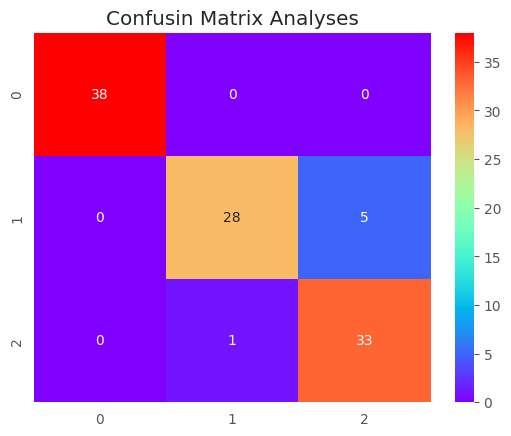

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='rainbow')
ax.set(title='Confusin Matrix Analyses')